## NAMA    : AGUNG REYNALDI AVIZENA <BR>NIM     : 1103204044 <BR>TUGAS KE - 2 

## <center> LIBRARY IMPORT </center>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## <center> DATA PREPEARATION </center>

In [11]:
# Memuat Data
data = pd.read_csv('delivery.csv')
print(data.head())
data.shape

   n.prod  distance  delTime
0       7       560    16.68
1       3       220    11.50
2       3       340    12.03
3       4        80    14.88
4       6       150    13.75


(25, 3)

In [12]:
X = data[['distance']]
y = data['delTime']

## <center> DATA VISUALIZATION </center>

#### - LINEAR REGGRESION

,n.prod,distance,delTime
n.prod,1.000000,0.824215,0.964615
distance,0.824215,1.000000,0.891670
delTime,0.964615,0.891670,1.000000


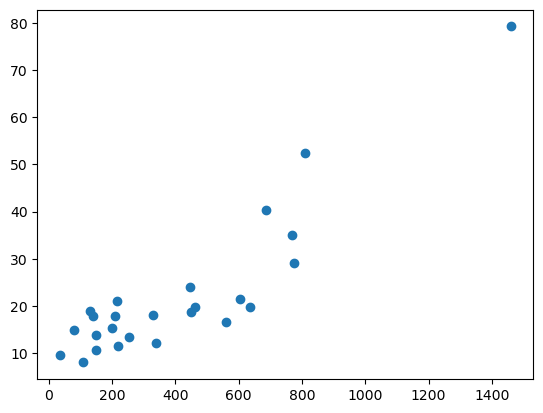

In [13]:

plt.scatter(data['distance'], data['delTime'])
data.corr()

In [14]:
x_distance = data['distance']
X_distance = x_distance[:, np.newaxis]
y_delivery = data['delTime'].values

reggresor = LinearRegression()
model = reggresor.fit(X_distance, y_delivery)
                      

C:\Users\agung\AppData\Local\Temp\ipykernel_16492\3528343966.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_distance = x_distance[:, np.newaxis]


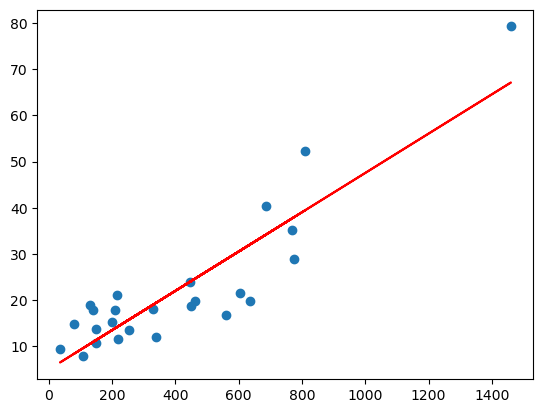

In [15]:
plt.scatter(X_distance, y_delivery)

y_pred = reggresor.predict(X_distance)
plt.plot(X_distance, y_pred, color='red')

In [16]:
X_baru = np.array([[35]])
y_pred = reggresor.predict(X_baru)
print(y_pred)

[6.45109103]


In [17]:
reggresor.score(X_distance, y_delivery)

0.7950755275911866

#### - POLYNOMIAL REGGRESION

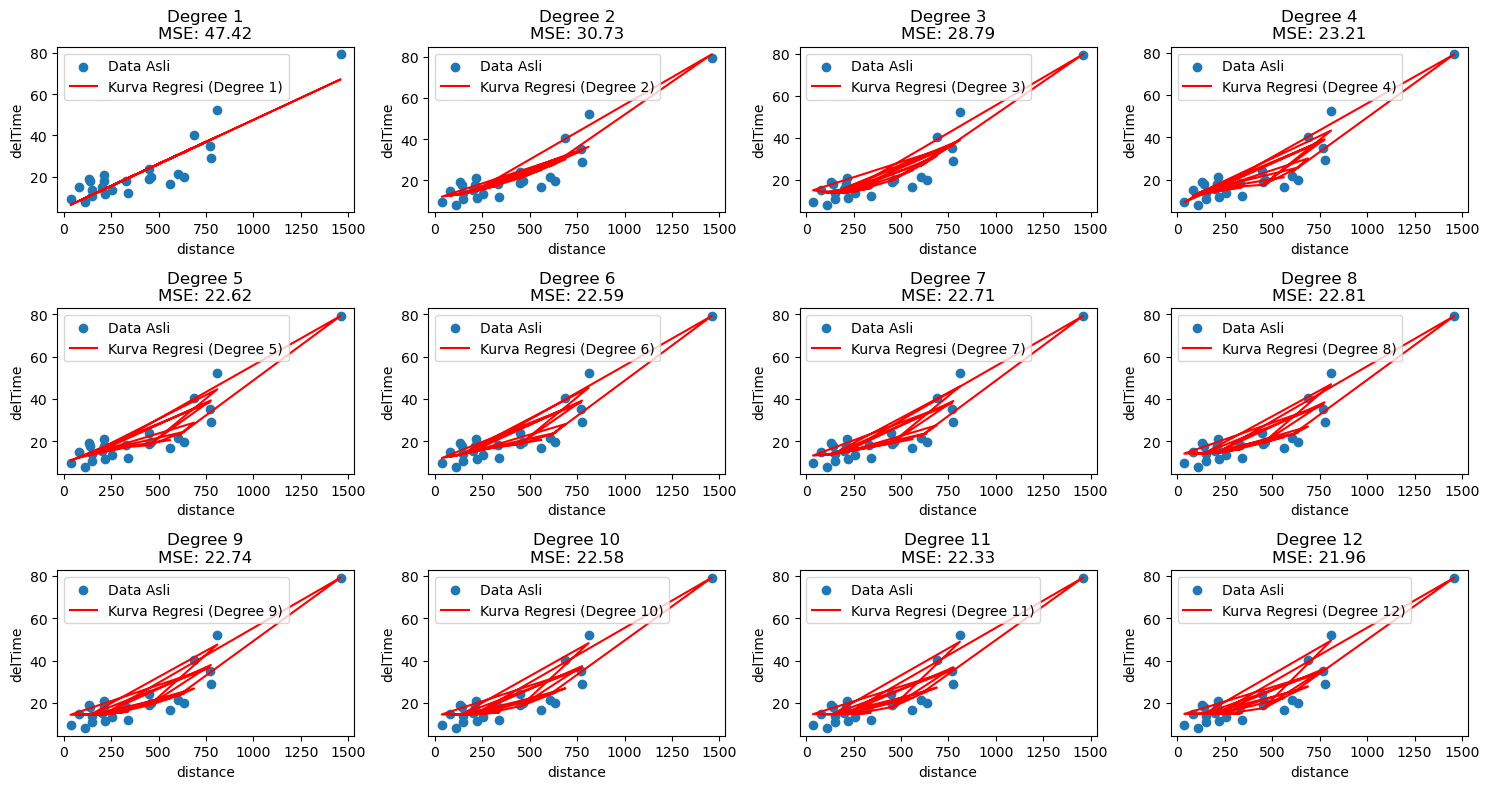

Degree 1: MSE = 47.42
Degree 2: MSE = 30.73
Degree 3: MSE = 28.79
Degree 4: MSE = 23.21
Degree 5: MSE = 22.62
Degree 6: MSE = 22.59
Degree 7: MSE = 22.71
Degree 8: MSE = 22.81
Degree 9: MSE = 22.74
Degree 10: MSE = 22.58
Degree 11: MSE = 22.33
Degree 12: MSE = 21.96


In [18]:
# Derajat yang ingin diuji
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
mse_values = []

# Membuat subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 8))
fig.tight_layout(pad=3.0)

for i, degree in enumerate(degrees):
    # Mengubah fitur X menjadi matriks polinomial dengan derajat tertentu
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Membuat model regresi linear dengan fitur polinomial
    model = LinearRegression()
    model.fit(X_poly, y)

    # Membuat prediksi
    y_pred = model.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Menampilkan plot data asli dan kurva regresi
    ax = axes[i // 4, i % 4]
    ax.scatter(X, y, label='Data Asli')
    ax.plot(X, y_pred, color='red', label='Kurva Regresi (Degree {})'.format(degree))
    ax.set_title('Regresi Polynomial: Degree {}'.format(degree))
    ax.set_title(f'Degree {degree}\nMSE: {mse:.2f}')
    ax.set_xlabel('distance')
    ax.set_ylabel('delTime')
    ax.legend()

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')